1. Importar todas las librerías necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

2. Inicializar algunas variables que después modificaremos

In [2]:
df = None
dataset = []
lista = []
OSs = {'L':'Linux', 'S':'Solaris', 'A':'AIX', 'H':'HP-UX'}
entornos = {'D' : 'Development', 'I':'Integration', 'T':'Testing', 'S':'Staging', 'P':'Production'}
paises = {'NOR':'Norway', 'FRA':'France', 'ITA':'Italy', 'ESP':'Spain', 'DEU': 'Germany', 'IRL': 'Ireland'}

3. Crear una función para generar los hostnames en base a unas reglas.

In [3]:
def set_hostnames(number_of_hosts: int):
    '''Funcion para armar el set de hostnames'''
    
    global lista
    lista = [] 
    node_counters = {}

    prop_OS = [0.4, 0.3, 0.2, 0.1]
    prop_entorno = [0.1, 0.1, 0.25, 0.25, 0.3]
    prop_pais = [0.06, 0.09, 0.16, 0.16, 0.23, 0.3]

    for i in range(number_of_hosts):
        os = np.random.choice(['L', 'S', 'A', 'H'], p = prop_OS)
        entorno = np.random.choice(['D', 'I', 'T', 'S', 'P'], p = prop_entorno)
        pais = np.random.choice(['NOR', 'FRA', 'ITA', 'ESP', 'DEU', 'IRL'], p= prop_pais)
        key = os + entorno + pais

        node_count = node_counters.get(key, 1)

        node = str(node_count).zfill(3)

        hostname = key + node
        lista.append(hostname)

        node_counters[key] = node_count + 1

    return lista



4. Crear una función para obtener el nombre del SO

In [4]:
def get_os(hostname: str) -> str:
    '''Funcion que permite identificar el Sistema Operativo a partir del hostname'''
    try:
        return OSs[hostname[0]]
    except KeyError:
        return 'Unknown'


5. Crear una función para obtener el nombre del entorno.

In [5]:
def get_environment(hostname: str) -> str:
        '''Funcion que permite identificar el entorno a partir del hostname'''
        try:
            return entornos[hostname[1]]
        except KeyError:
            return 'Unknown'
        

6. Creamos una función para obtener el nombre del país.

In [6]:
def get_country(hostname: str) -> str:
        '''Funcion que permite identificar el entorno a partir del hostname'''
        try:
            return paises[hostname[2:5]]
        except KeyError:
            return 'Unknown'
        

7. Crear una función para generar el DataFrame

In [7]:
def set_dataframe(count: int):
    '''Función para generar un DataFrame a partir de los hostnames.'''
    global df  
    global dataset  
    
    # Llamamos a la función set_hostnames para generar la lista con los hostnames
    lista = set_hostnames(count)  
    
    # Llenamos dataset con diccionarios usando las funciones previamente creadas
    for hostname in lista:
        os = get_os(hostname)  # Obtener el sistema operativo
        environment = get_environment(hostname)  # Obtener el entorno
        country = get_country(hostname)  # Obtener el país
        node = int(hostname[-3:])  # Extraer el número del nodo como int
        
        # Agregar un diccionario por cada hostname
        dataset.append({
            'hostname': hostname,
            'os': os,
            'environment': environment,
            'country': country,
            'node': node
        })
    
    # Crear el DataFrame y asignarlo a df
    df = pd.DataFrame(dataset)
    return df


8. Crear el DataFrame

In [8]:
df = set_dataframe(1500)
print(df)


      hostname       os  environment  country  node
0     LTFRA001    Linux      Testing   France     1
1     LPESP001    Linux   Production    Spain     1
2     ATIRL001      AIX      Testing  Ireland     1
3     HPITA001    HP-UX   Production    Italy     1
4     AIIRL001      AIX  Integration  Ireland     1
...        ...      ...          ...      ...   ...
1495  LPDEU035    Linux   Production  Germany    35
1496  ADIRL009      AIX  Development  Ireland     9
1497  LSESP021    Linux      Staging    Spain    21
1498  HINOR001    HP-UX  Integration   Norway     1
1499  SDITA009  Solaris  Development    Italy     9

[1500 rows x 5 columns]


In [9]:
# Prueba para verificar que los nodos se numeraron de manera correcta
df[(df['os'] == 'Solaris') & (df['country']=="Italy") & (df['environment']=='Testing')]


,hostname,os,environment,country,node
29,STITA001,Solaris,Testing,Italy,1
384,STITA002,Solaris,Testing,Italy,2
391,STITA003,Solaris,Testing,Italy,3
415,STITA004,Solaris,Testing,Italy,4
439,STITA005,Solaris,Testing,Italy,5
447,STITA006,Solaris,Testing,Italy,6
551,STITA007,Solaris,Testing,Italy,7
570,STITA008,Solaris,Testing,Italy,8
593,STITA009,Solaris,Testing,Italy,9
708,STITA010,Solaris,Testing,Italy,10


9. Guardar el DataFrame generado en un fichero CSV

In [10]:
df.to_csv('hosts.csv', header=True, index=False)
hosts_df = pd.read_csv('hosts.csv')
hosts_df

,hostname,os,environment,country,node
0,LTFRA001,Linux,Testing,France,1
1,LPESP001,Linux,Production,Spain,1
2,ATIRL001,AIX,Testing,Ireland,1
3,HPITA001,HP-UX,Production,Italy,1
4,AIIRL001,AIX,Integration,Ireland,1
...,...,...,...,...,...
1495,LPDEU035,Linux,Production,Germany,35
1496,ADIRL009,AIX,Development,Ireland,9
1497,LSESP021,Linux,Staging,Spain,21
1498,HINOR001,HP-UX,Integration,Norway,1


10. Generar un único gráfico, agrupando para cada país (country) los  entornos

<Axes: xlabel='country'>

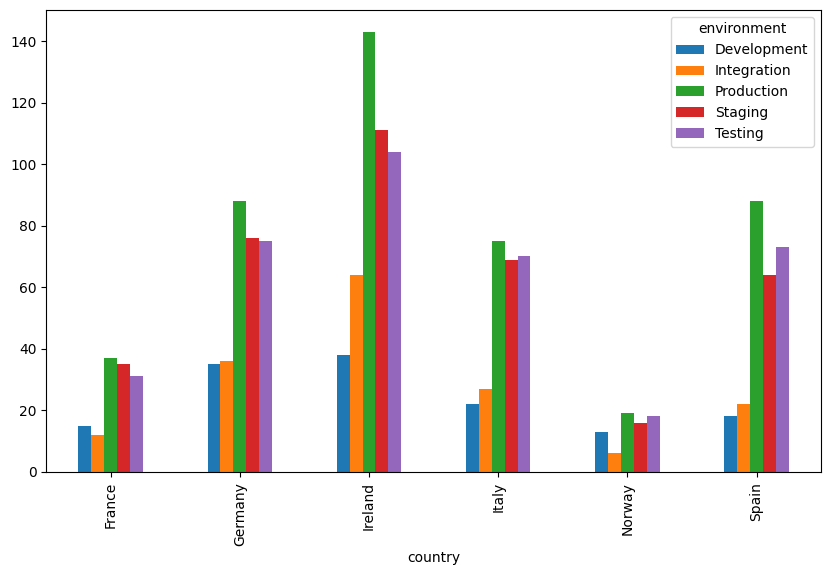

In [11]:
'''Grafico solicitado'''

p = hosts_df.groupby('country')['environment'].value_counts().unstack(fill_value=0)

p.plot(kind='bar', figsize=(10, 6))








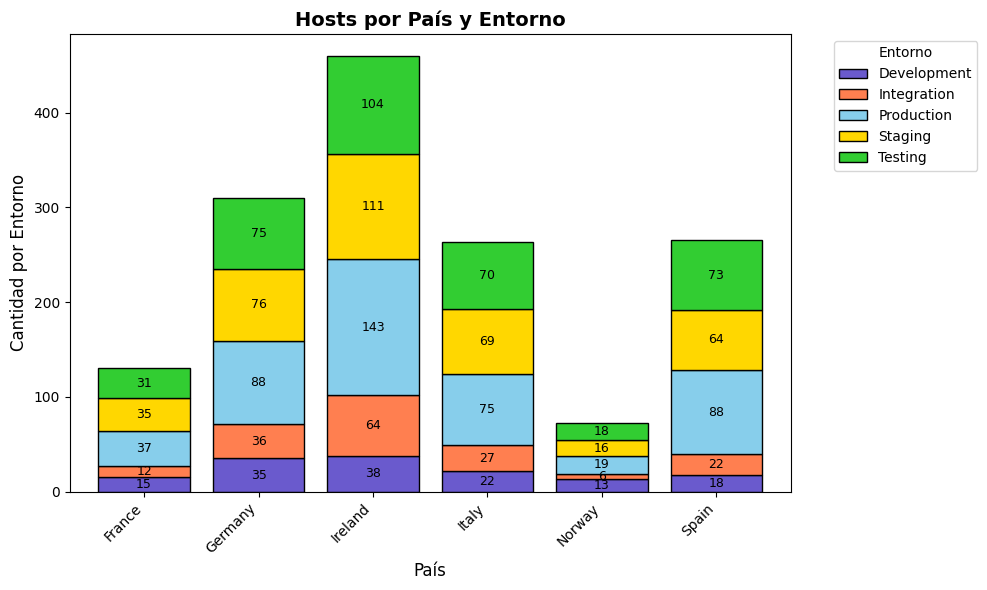

In [12]:
'''Grafico version mejorada esteticamente'''

# Generar el gráfico
p = hosts_df.groupby('country')['environment'].value_counts().unstack(fill_value=0)
ax = p.plot(
    kind='bar', 
    stacked=True, 
    color=['#6a5acd', '#ff7f50', '#87ceeb', '#ffd700', '#32cd32'], 
    figsize=(10, 6), 
    edgecolor='black',
    width=0.8)

# Títulos y etiquetas
plt.xlabel('País', fontsize=12)
plt.ylabel('Cantidad por Entorno', fontsize=12)
plt.title('Hosts por País y Entorno', fontsize=14, weight='bold')

# Mejorar etiquetas de los ejes
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Ajustar la leyenda
plt.legend(title='Entorno', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Añadir etiquetas de valores en las barras
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=9, color='black')

# Optimizar el layout para evitar cortes en la visualización
plt.tight_layout()

# Mostrar el gráfico
plt.show()
